Installing the dependencies

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

Loading the csv data into a pandas dataframe

In [18]:
df = pd.read_csv ("/content/chennai_bus_scheduling_dataset_1000 (1).csv")

**Preprocessing steps**

In [19]:
# Encoding the categorical variables
le_place = LabelEncoder()
le_route = LabelEncoder()
le_time = LabelEncoder()
le_peak = LabelEncoder()
le_traffic = LabelEncoder()

In [20]:
df['Place'] = le_place.fit_transform(df['Place'])
df['Route'] = le_route.fit_transform(df['Route'])
df['Time_of_Day'] = le_time.fit_transform(df['Time_of_Day'])
df['Peak_Type'] = le_peak.fit_transform(df['Peak_Type'])
df['Traffic_Conditions'] = le_traffic.fit_transform(df['Traffic_Conditions'])

In [21]:
# Feature engineering : Adding binary flag for peak hours
peak_times = ['Morning_Office', 'Morning_School', 'Afternoon_School', 'Evening_Office']
df['Is_Peak_Hour'] = df['Time_of_Day'].apply(lambda x: 1 if le_time.inverse_transform([x])[0] in peak_times else 0)

In [22]:
# Separating the Features and target
X = df[['Place', 'Route', 'Time_of_Day', 'Peak_Type', 'Passenger_Demand', 'Traffic_Conditions', 'Is_Peak_Hour']]
y = df['Scheduled_Buses']

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Training the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [31]:
# Evaluating the accuracy
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Train R² Score: 0.9998
Test R² Score: 0.9971
Train MAE: 0.09
Test MAE: 0.31


**Visualization on Train data**

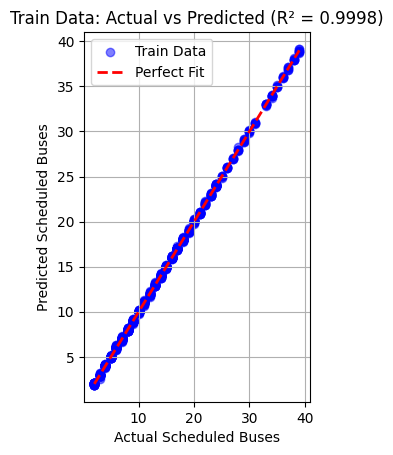

In [33]:
# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Scheduled Buses')
plt.ylabel('Predicted Scheduled Buses')
plt.title(f'Train Data: Actual vs Predicted (R² = {train_r2:.4f})')
plt.legend()
plt.grid(True)

**Visualization on text data**

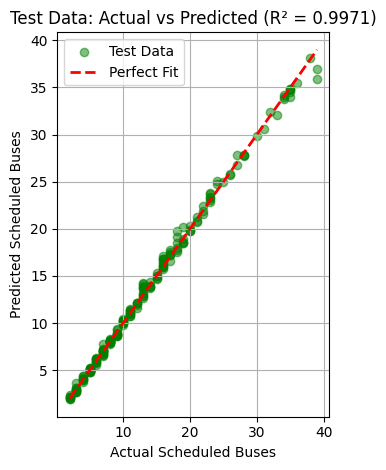

In [34]:
# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.5, label='Test Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Scheduled Buses')
plt.ylabel('Predicted Scheduled Buses')
plt.title(f'Test Data: Actual vs Predicted (R² = {test_r2:.4f})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

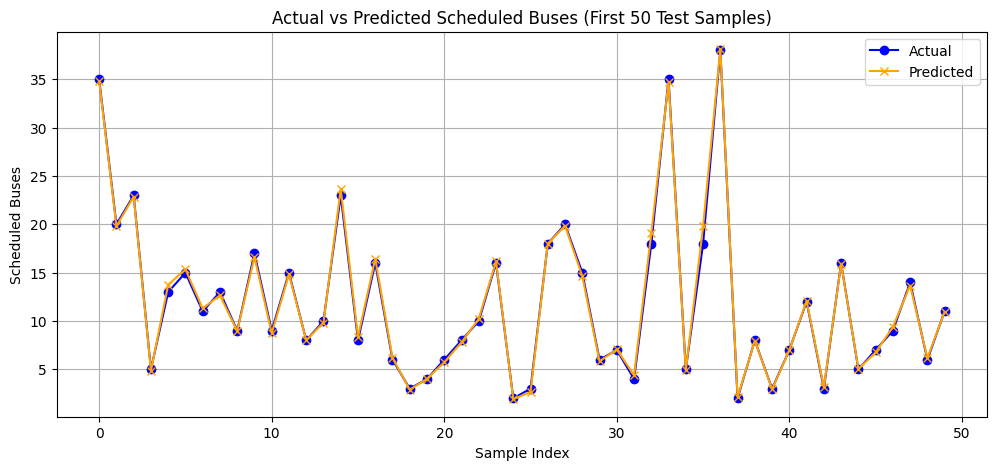

In [35]:
# Visualization 2: Line Plot (Actual vs Predicted over a subset)
subset_size = 50  # Show first 50 test samples for clarity
plt.figure(figsize=(12, 5))
plt.plot(y_test[:subset_size].values, label='Actual', color='blue', marker='o')
plt.plot(y_pred_test[:subset_size], label='Predicted', color='orange', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Scheduled Buses')
plt.title('Actual vs Predicted Scheduled Buses (First 50 Test Samples)')
plt.legend()
plt.grid(True)
plt.show()